# Summary of goals and findings for drug covariation across counties

## Goals
There appear to be strong trends across counties in terms of drug use (drug co-variation) that correlate with obvious regions of the country (deep south, plains states, southwest, northeast). To analyze these trends, I think the most interesting questions are:

- What are the demographic factors most correlated with dimensions of drug use?
    - Thus I gathered a couple more sources of data: http://www.countyhealthrankings.org/ (characteristics like insurance status, mental health issues, chronic disease screening), http://www.healthdata.org/ (life expectancy), population density (US census bureau).  These are have many expected correlations (see again, [fig 2](#Fig2) ).
- What are the characteristics of drugs that vary most across these top dimensions? 
    - In terms of types of drug indications that vary most across these dimensions (from Redbook)
    - In terms of general drug characteristics: acute, over-the-counter (OTC) (from redbook), release date (from FDA) 

## Findings
Three top axes account for the largest co-variation in drug prescription across counties and are easily interpretable in terms of characteristics of the counties, and characteristics of the drugs--particularly drugs related to heart disease and high blood pressure.

- [Axis 1](#Dim1) divides Deep South counties with bad health from the rest of the US counties. Deep south counties have newer drugs, associated with acute care. These counties take more severe high blood pressure drugs and opioids and muscle relaxants.  They have less preventive care and mental health drugs. 
    
    
- [Axis 2](#Dim2) western rural versus eastern urban counties. The western rural white are poorer and less educated with more neurological drugs. Eastern urban counties have less generic drug use, and they use a lot of skin care drugs
    
    
- [Axis 3](#Dim3) western urban counties with higher hispanic population, versus eastern rural mostly white counties. 

Thyroid drugs have very interesting variation across counties:  anti-correlated with the poor black southern more rural counties (V1), but positively correlated with the white western rural counties (V2) and the diverse urban western counties (V3).

High blood pressure and cardiovascular-related drugs also have interesting variation across counties, with more severe versions of these drugs prescribed in the southern rural black or eastern rural white counties. 

Antidepressants are most associated with western, rural, white counties.

## Method
An obvious way to find the relationships between county drug usage and these county characteristics is a regression of the form: `drug ~ demographics`

Below, I show the significance of the demographic predictors doing regression for anticoagulants (warfarin and enoxaparin) and high blood pressure/cardiac drugs (valsartan, hydrochorothiazide valsartan). There are some relationships, like counties with a higher fraction of uninsured people have less anticoagulants.  The cardiac drugs are more associated with rural counties with poor mental health.

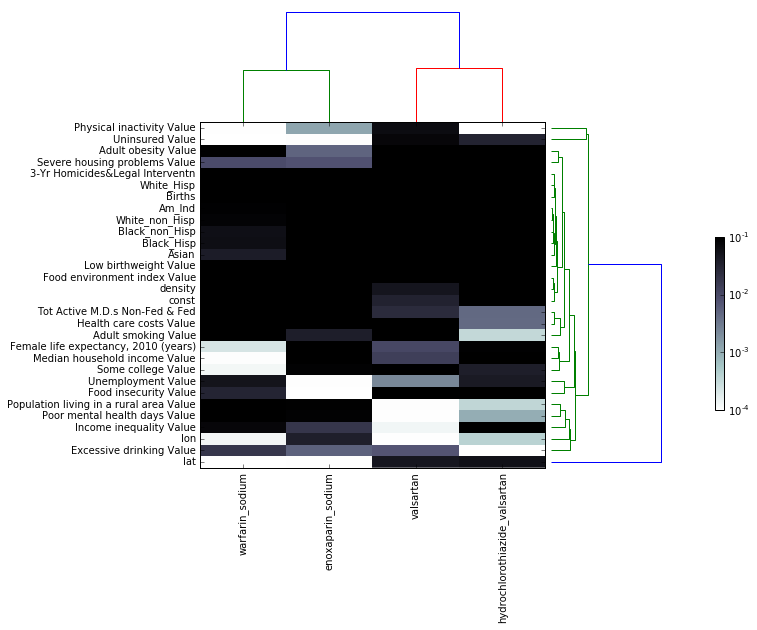

In [4]:
from IPython.display import Image 
## Fig 1
Image(filename='png/coag_cardiac2.png',width=800)

<a id='Fig2'></a>

But these demographic factors are fairly correlated with each other (below I show the correlations again, for review). It makes it hard to get a big picture view of the influences: with correlated predictors, only one will be a significant predictor. As well, you can't get an idea of what kinds of drugs co-occur in the same counties.

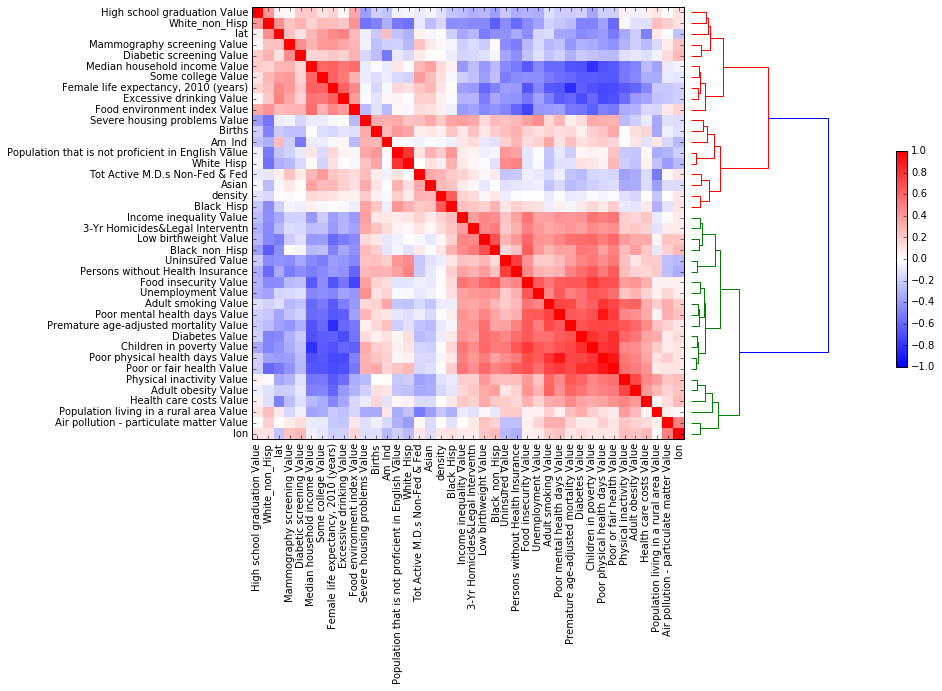

In [3]:
## Fig 2
Image(filename='png/health_demo_cty.png',width=900)

In order to analyze both the variation of drugs across counties, and the variation of demographic characteristics across counties simultaneously, I used canonical correlation anaysis (https://en.wikipedia.org/wiki/Canonical_correlation). Below is a schematic of the process and what the results look like. The steps are outlined in Fig 3 below:

- a. Prepare two input matrices $x, y$ representing observations (counties) over two sets of variables (drugs and demographics).
- b. Canonical correlation analysis: This creates a projected version of the county matrices $u = x \cdot a; v = y \cdot b$ that capture the most co-variation between the drug variables and the demographic variables. The scatter plot in **b.** compares the first dimension: the first column of $u$ versus the first column of $v$, showing high correlation. 
- c. Relate this back to the input data: I can compare columns of $u$ (or $v$) directly to columns of $x$ or $y$ (**c**, left plot).  In order to compare the dimensions to a class of drugs, rather than individual drugs, I average across the drugs in the class (**c** middle plot).  Then for a demographic characteristic and drug class that are both highly correlated with the dimension, I examine the correlation of these in the matrices $x$ and $y$ directly, 


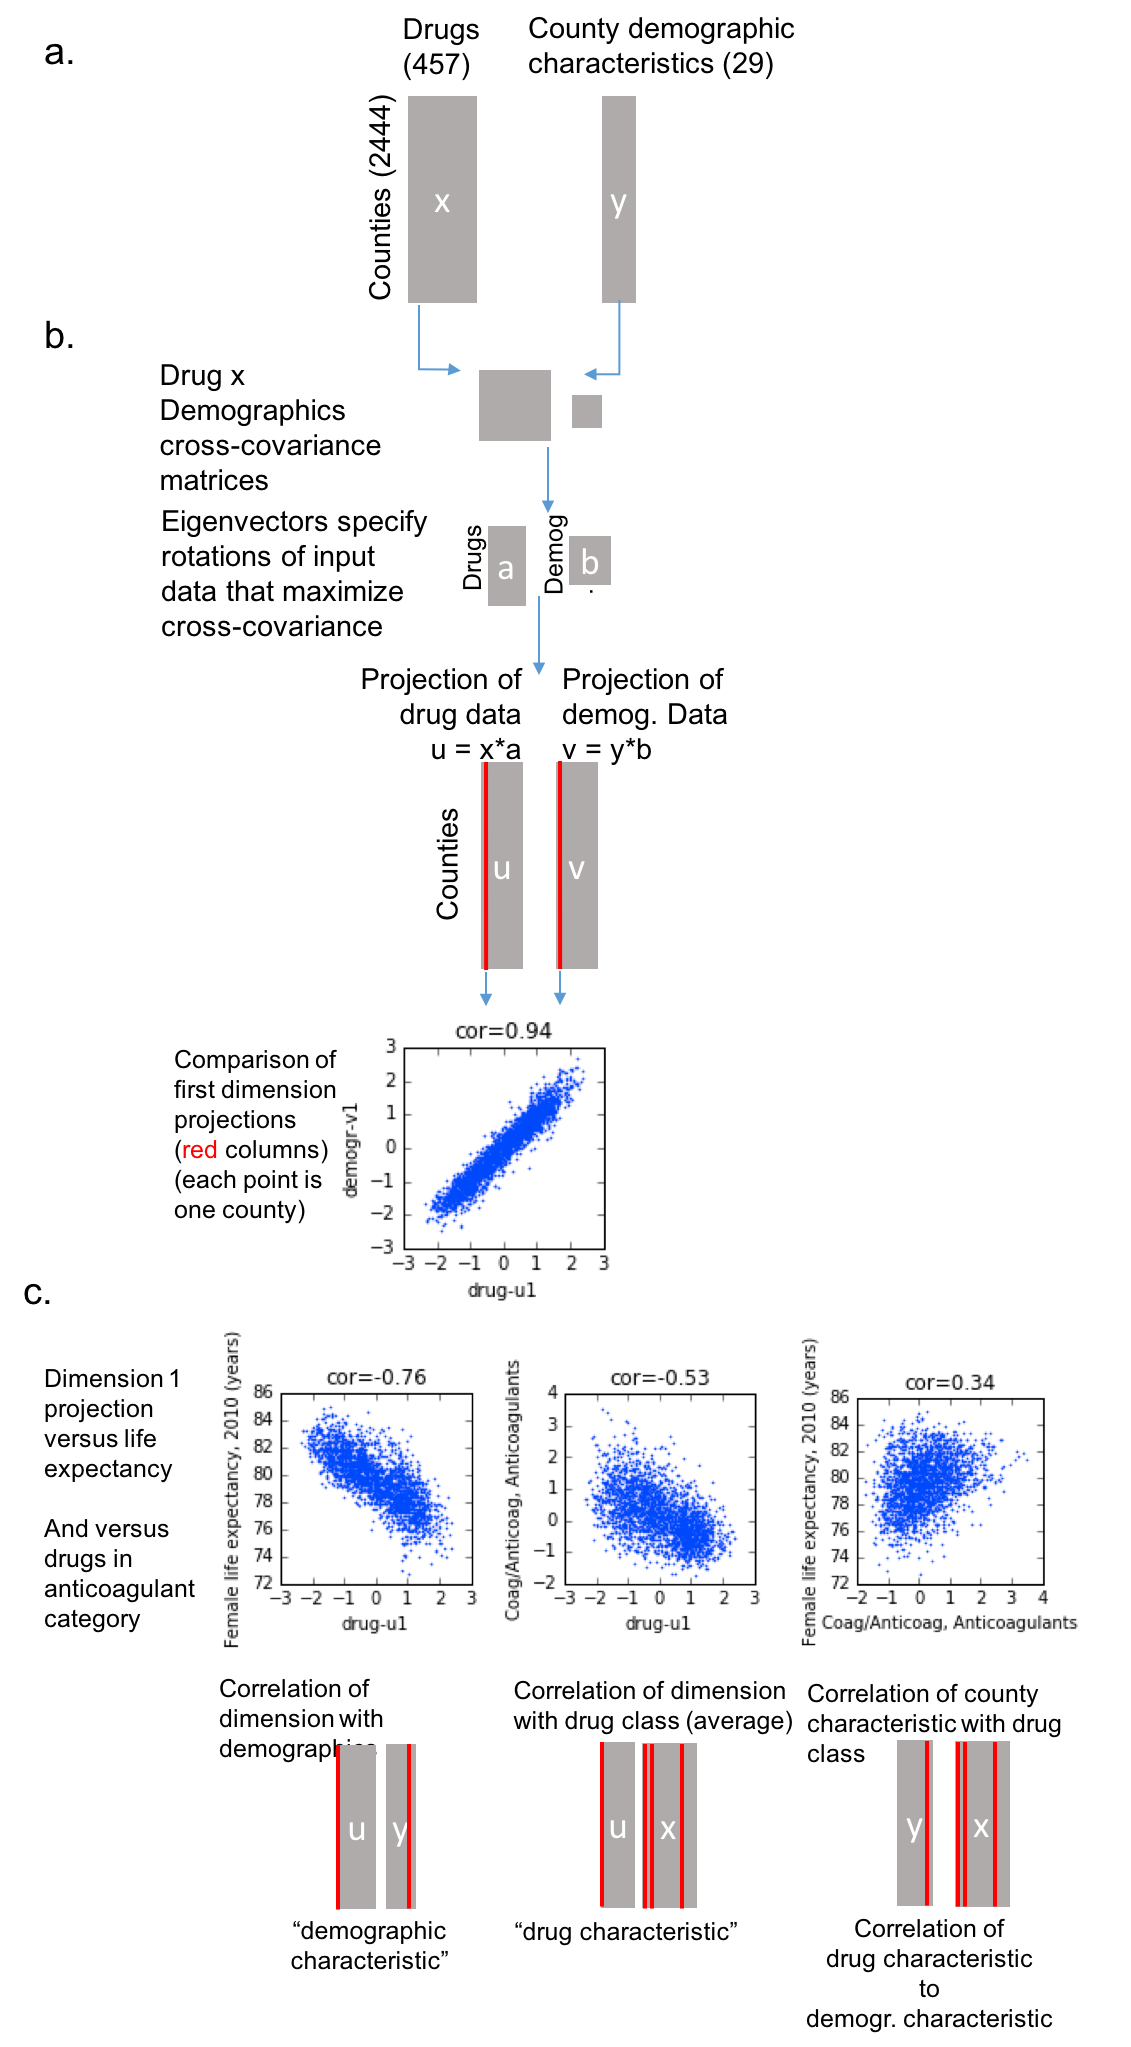

In [16]:
# Fig 3
Image(filename='png/ccacartoon.png',width=600)

<a id='Dim1'></a>
#### First axis: deep south 
The figure below visualizes the first dimension. To explain: 

- **demographic characteristic**: (blue points, labeled) represent the columns of $y$ that are correlated with U1 (as in Fig 3c, left), using a cutoff (absolute value > .1).  The correlations are on the y-axis.  For example, as in Fig 3c, left, female life expectancy has a correlation with V1 of -.76.
- **drug characteristic**. (green points) are the same, except they are an average of columns of $x$ (as in Fig 3c, middle), so they tend to have somewhat smaller absolute values. Again, correlation of anticoagulants with V1 = -.53.  
- **cyan lines**: connect demographic characteristics and drug characteristics that are **positively** correlated, again using a threshold. 
    - As we'd hope, the demographic characteristics that are positively correlated with V1 are only correlated with the drug charateristics that are also positively correlated with U1. That is, not many of the lines cross the horizontal dashed zero line. 
    - (Note that negative correlations are not represented as the bottom-left points should be anticorrelated with the top-right points.)

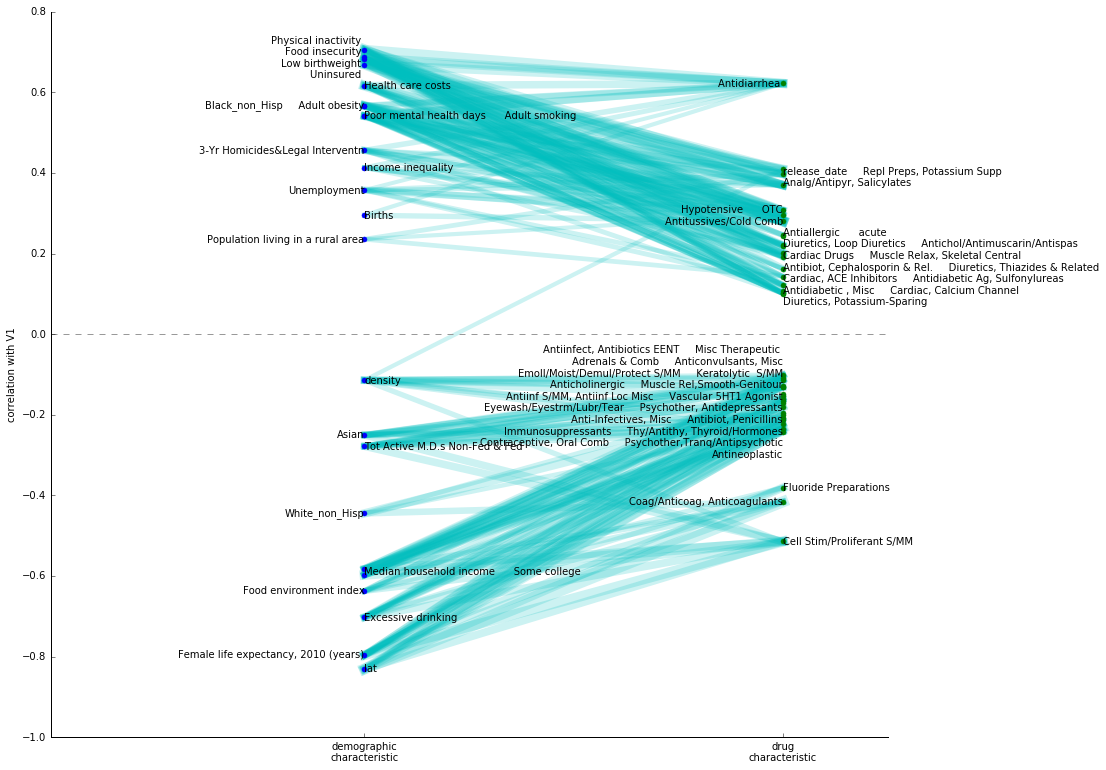

In [18]:
Image(filename='png/V1_d100p10k.png',width=1000)

To point out a few more things about this axis:

In terms of demographic characteristics, the deep south counties have a high black population, poverty, poor health, higher health costs. 

In terms of drugs, these counties take more over the counter drugs. The drugs tend to be newer (*release_date*), are associated with acute health needs. The main associated drug types are:
- Opiates: *Analg/Antipyr, Salicylates*.  Additionally the *Antidiarrhea* drug is lomotil, which is an opiate, but has low abuse potential, so I am not sure if this is related.  Also Muscle relaxants
- High blood pressure drugs:  *Cardiac, Calcium Channel; Cardiac Drugs; Repl Preps, Potassium Supp; Hypotensive; Diuretics*. 
- Antidiabetic drugs

The contrast is in particular to richer counties that are more white and asian, higher life expectancy, higher income. In particular, counties in MA, VT, MN, WI, AK. 

These richer counties They take more treatments for chronic diseases, preventive care, mental health drugs, and skin care (basically, a mixture of the second and third dimensions, below).

<a id='Dim2'></a>    
#### Second axis:  western white rural counties versus mainly eastern racially-diverse urban counties
One end of this axis contains more north-western rural counties in OR, ID, AK, CA, WA, with high white population.  These people take more antidepressants, CNS drugs (neurological diseases). They take older and generic drugs.

The other extreme is racially-diverse urban counties, mostly in NY, NJ, MD, VA.  These use more brand drugs/newer drugs, and more OTC drugs.  The main associated drugs are cosmetic skin care and vitamins, and antifungals.

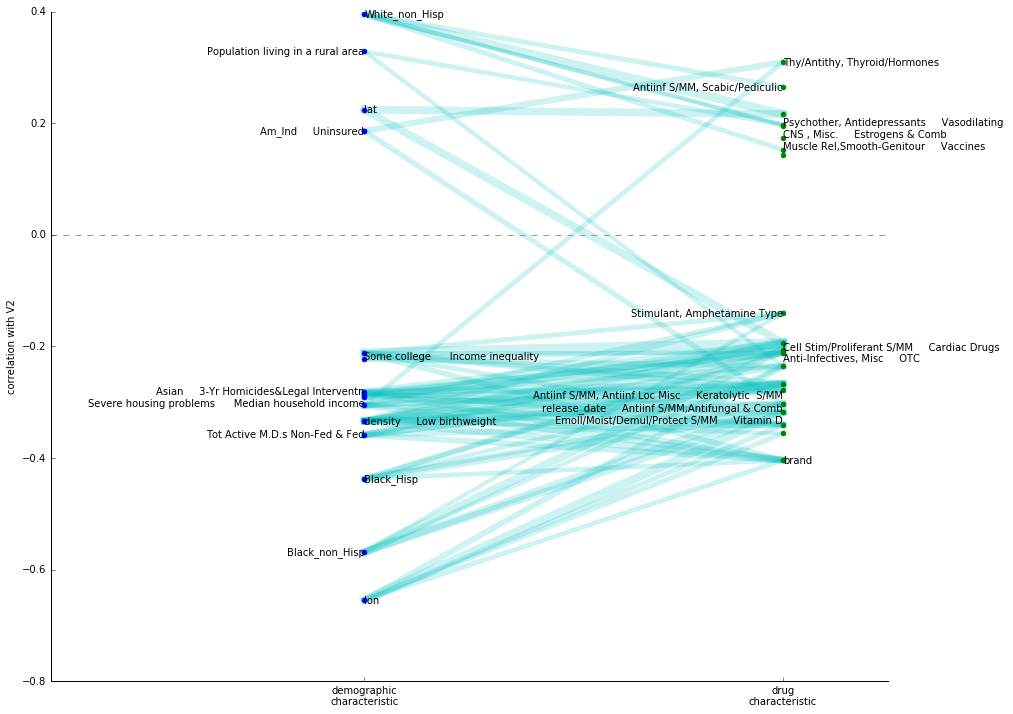

In [20]:
Image(filename='png/V2_d100p10k.png',width=1000)

<a id='Dim3'></a>    
#### Third axis:  western urban versus eastern rural counties
One one extreme, western urban counties with high "White_Hisp" (mexican american?) population, in CA, TX, CO, HI. Take newer, non-generic, and acute care drugs.  

The eastern/northeastern rural white counties in WV, ME, KY, PA have poor health indicators, and take more drugs associated with severe high blood pressure.  

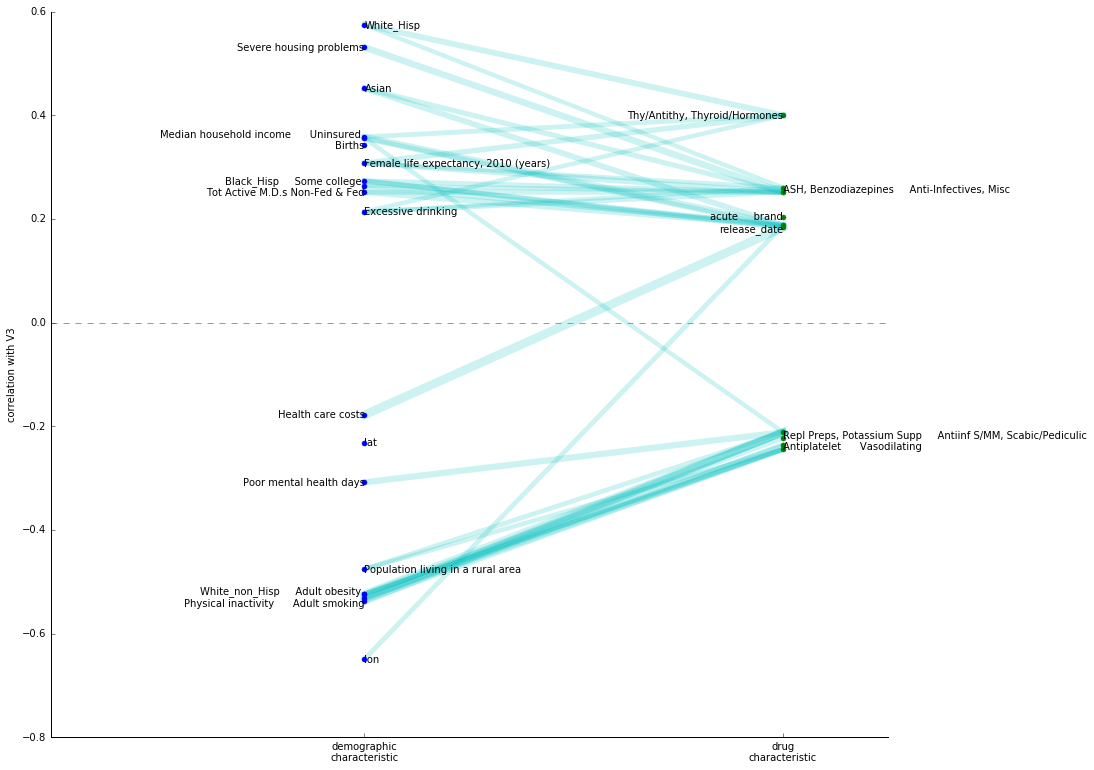

In [23]:
Image(filename='png/V3_d100p10k.png',width=1000)